# SUPERVISED MACHINE LEARNING (LINEAR REGRESSION)

### Name: Pranali Prakash Magar

### The Sparks Foundation (Data science and business analytics)(GRIP JUNE21)

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Reading the data from the link provided in GRIP Task pdf

In [2]:
link= "http://bit.ly/w-data"
s_data=pd.read_csv(link)
print("Data imported Succesfully")

Data imported Succesfully


In [3]:
s_data.head(9)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81


In [4]:
s_data.tail(9)

,Hours,Scores
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
#shape gives the shape of an array

In [6]:
s_data.shape

(25, 2)

In [7]:
#Describe() function shows count, mean, std, minimum, percentiles & maximum

In [8]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
#info() function to get information about the data

In [10]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [11]:
s_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

 In the dataset there are 25 students, study hours and marks are already given. we have to predict the percentage of students based on number of hours the student studies.

## DATA VISUALIZATION
## To plot box plot

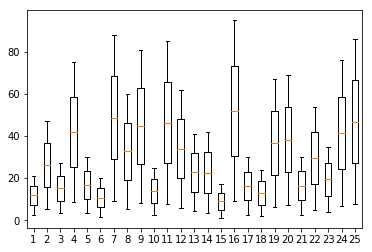

In [12]:
plt.boxplot(s_data)
plt.show()

## To plot score distribution

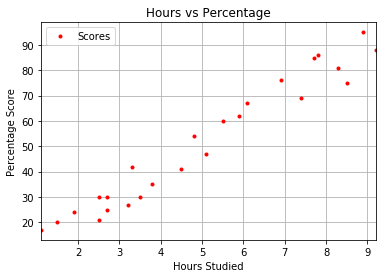

In [13]:
s_data.plot(x='Hours', y='Scores', style='r.')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.grid(True)
plt.show()

### Conclusion= The graph clearly shows positive linear relation between number of hours studied and percentage of score.
### PREPARING THE DATA

In [14]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values

### Splitting the data using train test split

In [15]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

### TRAINING THE ALGORITHM

In [16]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


## Plot the test data.

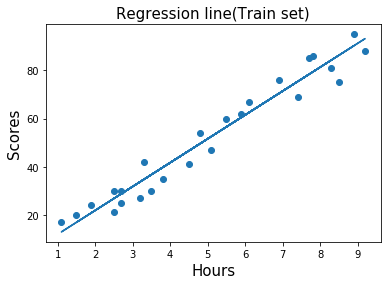

In [17]:
line = regressor.coef_*X+regressor.intercept_


plt.scatter(X, y)
plt.plot(X, line);
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Train set)",fontsize=15)
plt.show()

### Calculating the accuracy of model on train dataset

Train set Score
0.9515510725211553


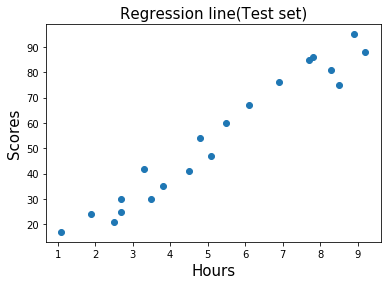

In [18]:
plt.scatter(X_train,y_train)
print("Train set Score")
print(regressor.score(X_train,y_train))
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Test set)",fontsize=15)
plt.show()

### Calculating the accuracy of model on Test dataset

Test Score
0.9454906892105356


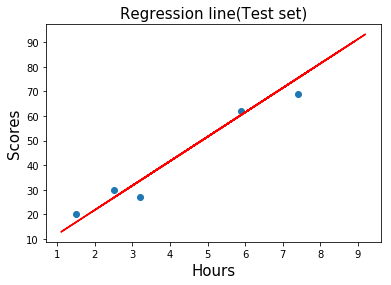

In [19]:
print("Test Score")
print(regressor.score(X_test,y_test))
plt.scatter(X_test,y_test)
plt.plot(X_train,regressor.predict(X_train),color="r")
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Test set)",fontsize=15)
plt.show()

### Making Predictions

In [20]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### Comparing actual vs predicted scores

In [21]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Calculating the predicting score of the model

In [22]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


### Calculating mean absolute error of the module

In [23]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('R2 Score:',metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 4.183859899002975
R2 Score: 0.9454906892105356


### So, we can conclude that if a student studies 9.25 hours a day his predicted score will be 93.69%

### TO SAVE THE MODULE

In [24]:
import joblib
joblib.dump(regressor,"TASK.pckl")

['TASK.pckl']

In [25]:
model=joblib.load("TASK.pckl")